In [1]:
import matplotlib.pyplot as plt
import numpy as np

from Annotated_MNIST import Annotated_MNIST

%matplotlib inline

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Low: 50
Normal: 485
High: 600



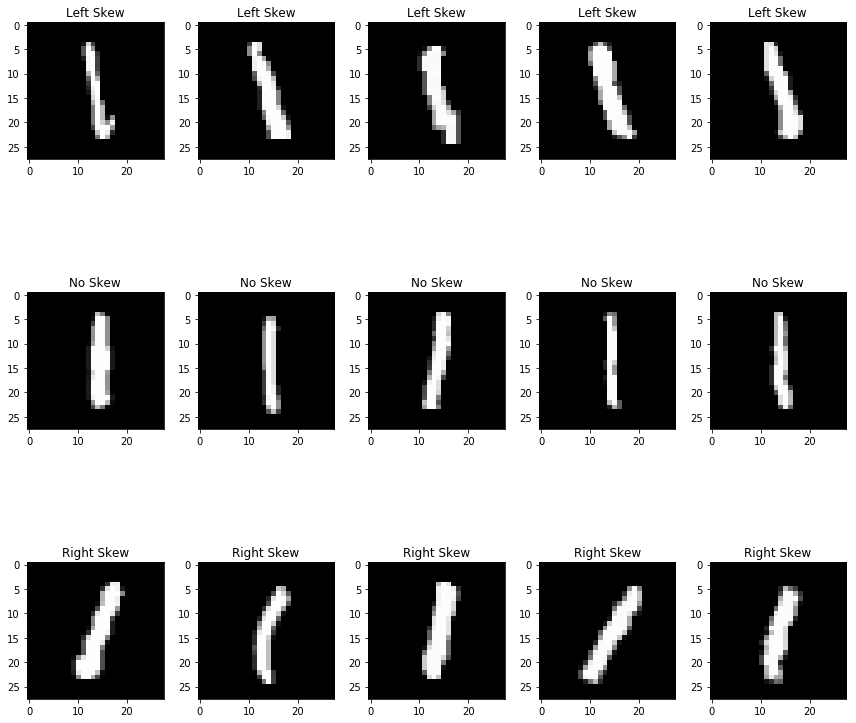

In [2]:
test = Annotated_MNIST(train=False)
images = test.images
l_idx, n_idx, h_idx = test.skew_stats(num=1, bound=6, skew_range=25)

plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(3, 5, 5 * 0 + (i + 1))
    plt.imshow(images[l_idx[20 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Left Skew')
    
    plt.subplot(3, 5, 5 * 1 + (i + 1))
    plt.imshow(images[n_idx[20 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('No Skew')
    
    plt.subplot(3, 5, 5 * 2 + (i + 1))
    plt.imshow(images[h_idx[40 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Right Skew')

plt.tight_layout()

Low: 290
Normal: 408
High: 311



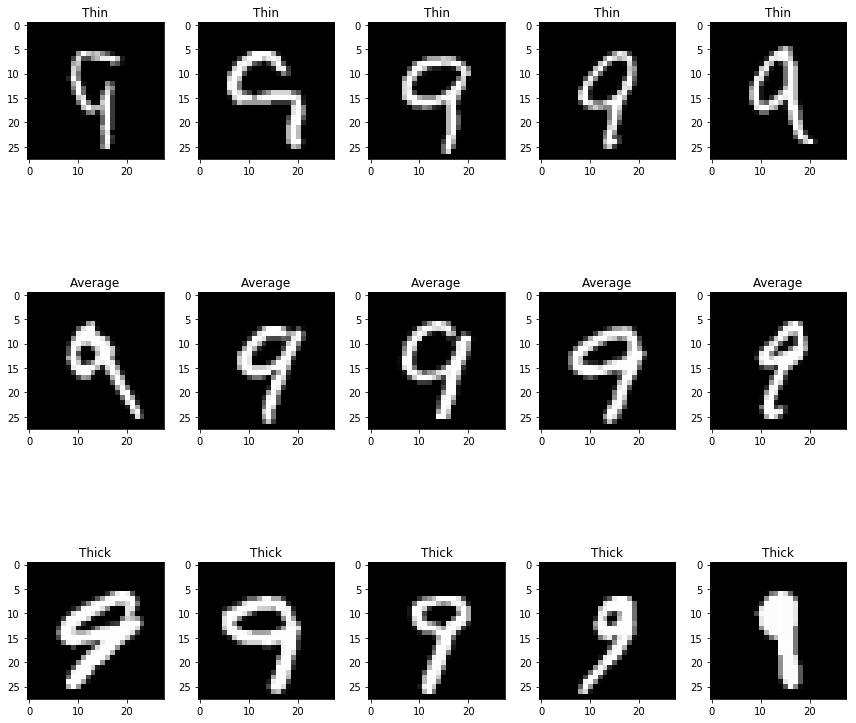

In [3]:
l_idx, n_idx, h_idx = test.thickness_stats(num=9, line=22, thickness_range=0)

plt.figure(figsize=(12, 12))
for i in range(5):
    plt.subplot(3, 5, 5 * 0 + (i + 1))
    plt.imshow(images[l_idx[i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Thin')
    
    plt.subplot(3, 5, 5 * 1 + (i + 1))
    plt.imshow(images[n_idx[i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Average')
    
    plt.subplot(3, 5, 5 * 2 + (i + 1))
    plt.imshow(images[h_idx[20 + i]], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))
    plt.title('Thick')

plt.tight_layout()

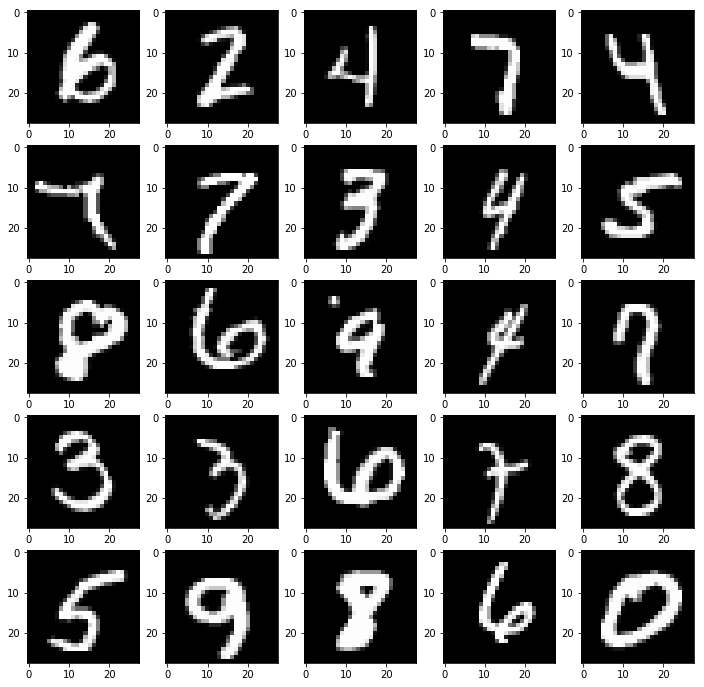

In [4]:
for i in range(100):
    descriptions, batch_xs, batch_ys = test.next_batch(128, resize=False, convert_to_idx=False)

imgs = np.reshape(batch_xs, (-1, 28, 28))

plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, (i + 1))
    plt.imshow(imgs[i], interpolation='NONE', vmin=0, vmax=1, cmap=plt.get_cmap('gray'))

In [5]:
descriptions

[['normal', 'number', 'six', 'with', 'average', 'skew'],
 ['normal', 'number', 'two', 'with', 'average', 'skew'],
 ['thin', 'number', 'four', 'with', 'right', 'skew'],
 ['thick', 'number', 'seven', 'with', 'left', 'skew'],
 ['thin', 'number', 'four', 'with', 'average', 'skew'],
 ['thick', 'number', 'seven', 'with', 'left', 'skew'],
 ['thin', 'number', 'seven', 'with', 'right', 'skew'],
 ['normal', 'number', 'three', 'with', 'average', 'skew'],
 ['thin', 'number', 'four', 'with', 'right', 'skew'],
 ['thick', 'number', 'five', 'with', 'right', 'skew'],
 ['thick', 'number', 'eight', 'with', 'right', 'skew'],
 ['normal', 'number', 'six', 'with', 'left', 'skew'],
 ['thick', 'number', 'nine', 'with', 'left', 'skew'],
 ['normal', 'number', 'four', 'with', 'right', 'skew'],
 ['normal', 'number', 'seven', 'with', 'left', 'skew'],
 ['thick', 'number', 'three', 'with', 'average', 'skew'],
 ['thin', 'number', 'three', 'with', 'average', 'skew'],
 ['normal', 'number', 'six', 'with', 'right', 'skew'